# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=4e569c9efe409bd357936bc007675e7c&q=tuatapere'

In [4]:
weather = requests.get(city_url)

print(weather)

# Get the temperature from the response
#temps are defaulted to Kelvin
# to change units from Kelvin, use &units= property, valid values are imperial(fahrenheit) or metric(celsius)
weatherJSON = weather.json()
weatherJSON

<Response [200]>


{'coord': {'lon': 167.6833, 'lat': -46.1333},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 282.2,
  'feels_like': 281.38,
  'temp_min': 282.2,
  'temp_max': 282.2,
  'pressure': 1015,
  'humidity': 93,
  'sea_level': 1015,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 1.84, 'deg': 20, 'gust': 2.07},
 'clouds': {'all': 22},
 'dt': 1678108007,
 'sys': {'country': 'NZ', 'sunrise': 1678127549, 'sunset': 1678174129},
 'timezone': 46800,
 'id': 2180815,
 'name': 'Tuatapere',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | akdepe
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | nikolayevsk-na-amure
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | mogzon
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | pyay
Processing Record 10 of Set 1 | ranfurly
Processing Record 11 of Set 1 | kenai
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 15 of Set 1 | cape coral
Processing Record 16 of Set 1 | tondano
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | souillac
Processing Record 23 o

Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | tingrela
City not found. Skipping...
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | ipilan
Processing Record 42 of Set 4 | burica
City not found. Skipping...
Processing Record 43 of Set 4 | suoyarvi
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | santa maria
Processing Record 46 of Set 4 | nazca
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | valparaiso
Processing Record 49 of Set 4 | dibaya
City not found. Skipping...
Processing Record 0 of Set 5 | vostok
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | karaul
City not found. Skipping...
Processing Record 3 of Set 5 | darhan
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | k

Processing Record 21 of Set 8 | adre
Processing Record 22 of Set 8 | nome
Processing Record 23 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 8 | miles city
Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | rochegda
Processing Record 27 of Set 8 | lorengau
Processing Record 28 of Set 8 | sembe
Processing Record 29 of Set 8 | port keats
Processing Record 30 of Set 8 | humberto de campos
Processing Record 31 of Set 8 | san francisco
Processing Record 32 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | oistins
Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | birao
Processing Record 37 of Set 8 | tpig
Processing Record 38 of Set 8 | belmonte
Processing Record 39 of Set 8 | banyo
Processing Record 40 of Set 8 | kathmandu
Processing Record 41 of Set 8 | kulhudhuffushi
Processing Record 42 of Set 8 | albanel
Processing Record 43 of Set 8 | h

Processing Record 9 of Set 12 | laguna
Processing Record 10 of Set 12 | kidal
Processing Record 11 of Set 12 | pasighat
Processing Record 12 of Set 12 | satitoa
City not found. Skipping...
Processing Record 13 of Set 12 | hopewell
Processing Record 14 of Set 12 | san antonio
Processing Record 15 of Set 12 | koumac
Processing Record 16 of Set 12 | gilazi
City not found. Skipping...
Processing Record 17 of Set 12 | chenzhou
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | freeport
Processing Record 20 of Set 12 | nara
Processing Record 21 of Set 12 | smithers
Processing Record 22 of Set 12 | casper
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | wuwei
Processing Record 25 of Set 12 | milos
Processing Record 26 of Set 12 | atka
City not found. Skipping...
Processing Record 27 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 12 | nantucket
Processing Record 29 of Set 12 | ngukurr
City not found. Skip

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akdepe,42.0551,59.3788,278.32,63,12,3.86,TM,1677881494
1,punta arenas,-53.1500,-70.9167,278.21,87,75,10.29,CL,1677881494
2,nikolayevsk-na-amure,53.1406,140.7300,255.15,98,72,1.46,RU,1677881494
3,kavieng,-2.5744,150.7967,298.77,88,100,5.58,PG,1677881495
4,mogzon,51.7435,111.9606,260.49,96,60,0.01,RU,1677881495


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akdepe,42.0551,59.3788,278.32,63,12,3.86,TM,1677881494
1,punta arenas,-53.1500,-70.9167,278.21,87,75,10.29,CL,1677881494
2,nikolayevsk-na-amure,53.1406,140.7300,255.15,98,72,1.46,RU,1677881494
3,kavieng,-2.5744,150.7967,298.77,88,100,5.58,PG,1677881495
4,mogzon,51.7435,111.9606,260.49,96,60,0.01,RU,1677881495


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

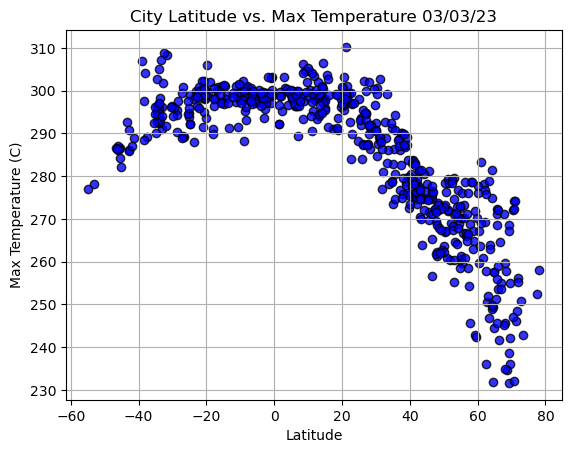

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", facecolors="blue", marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Max Temperature %s" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

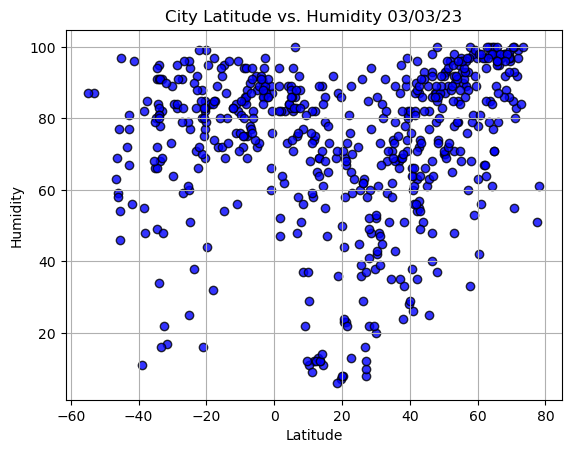

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", facecolors="blue", marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity %s" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

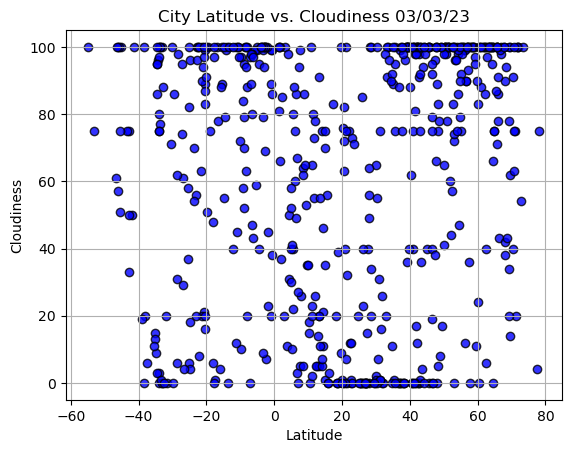

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", facecolors="blue", marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness %s" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

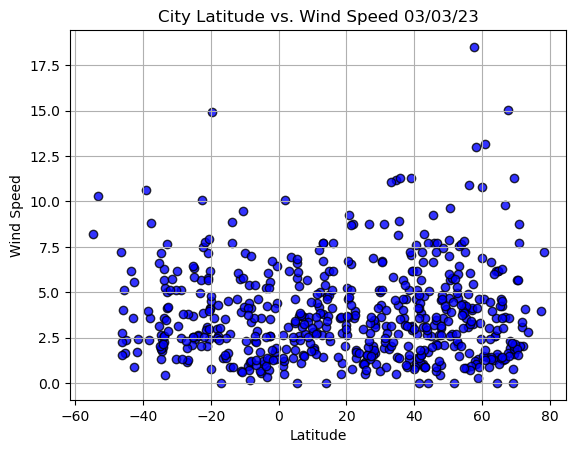

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", facecolors="blue", marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed %s" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title('Linear Regression')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northern_Hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
Northern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akdepe,42.0551,59.3788,278.32,63,12,3.86,TM,1677881494
2,nikolayevsk-na-amure,53.1406,140.7300,255.15,98,72,1.46,RU,1677881494
4,mogzon,51.7435,111.9606,260.49,96,60,0.01,RU,1677881495
7,iqaluit,63.7506,-68.5145,264.00,85,100,2.57,CA,1677881496
8,pyay,18.8167,95.2167,293.66,36,0,1.08,MM,1677881496


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
Southern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,278.21,87,75,10.29,CL,1677881494
3,kavieng,-2.5744,150.7967,298.77,88,100,5.58,PG,1677881495
5,hobart,-42.8794,147.3294,286.07,81,75,3.60,AU,1677881483
6,lebu,-37.6167,-73.6500,289.23,85,6,8.82,CL,1677881495
9,ranfurly,-45.1333,170.1000,282.10,97,100,2.36,NZ,1677881496


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7758803360587344


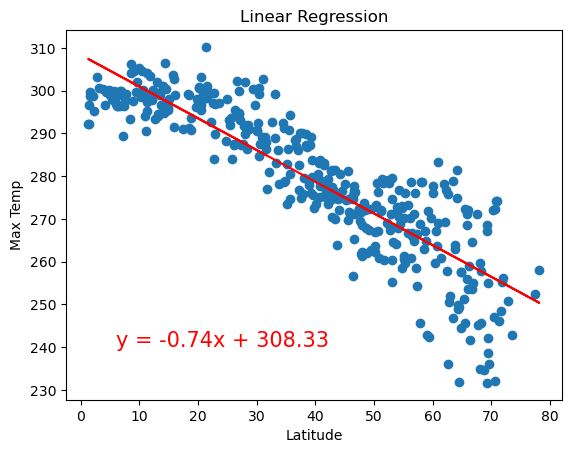

In [36]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,240))


The r-squared is: 0.2829843827365199


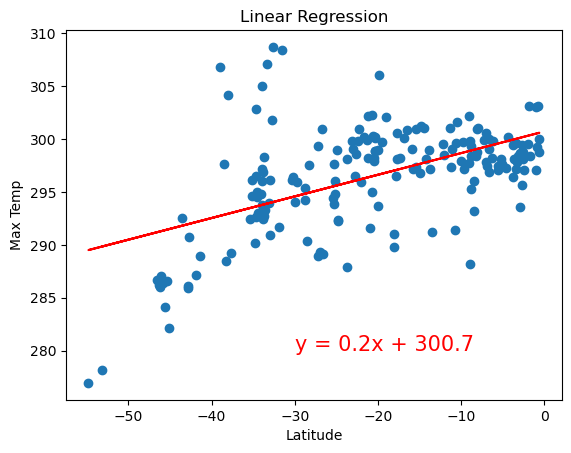

In [37]:
# Linear regression on Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,280))


In [ ]:
#There seems to pe a small positive correlation between latitude and Temp. This plot is showing that as you get closer
#to the equator, the higher the temp is going.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17357901740275494


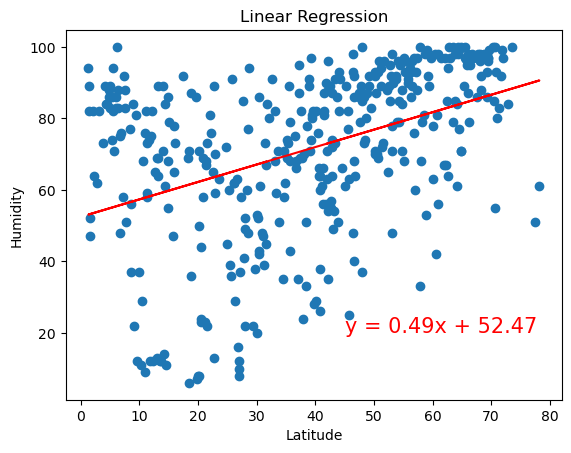

In [40]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,20))

The r-squared is: 0.08792537601027811


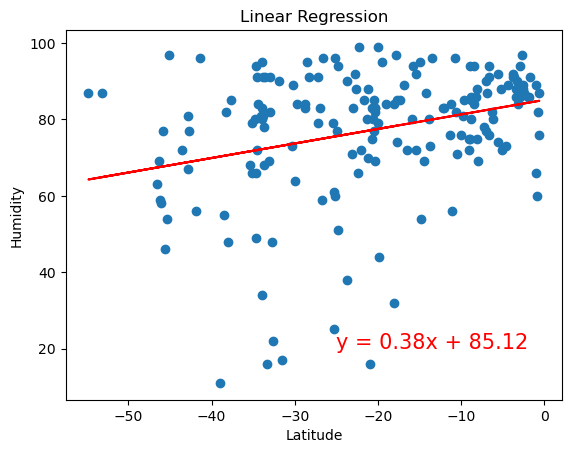

In [44]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,20))


In [ ]:
#With this scatter plot, the r-squared is showing that there isn't much of a correlation at all between
#latitude and humidity.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.14229448403518977


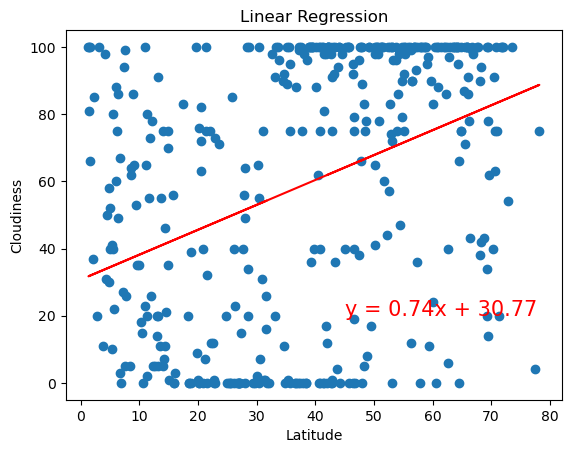

In [45]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(45,20))

The r-squared is: 0.029504558039144983


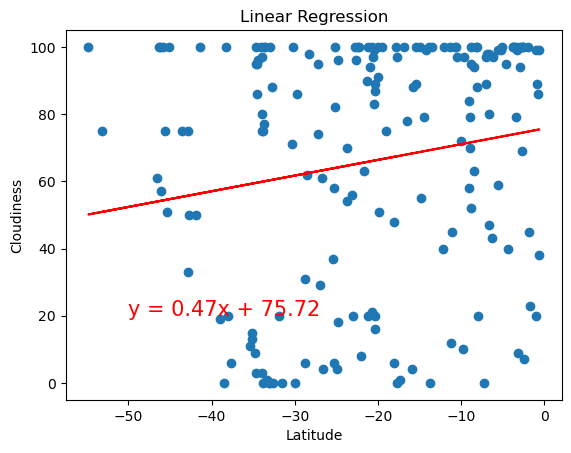

In [48]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,20))

In [ ]:
#With the scatter plot relationship between latitude and cloudiness, this plot is show basically no
#relationship between either.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0025979285503517405


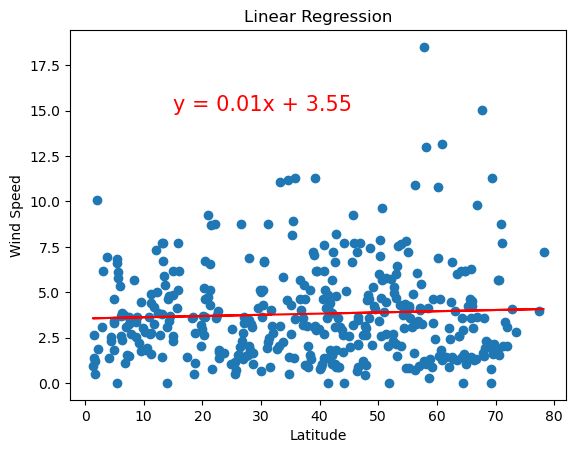

In [51]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(15,15))

The r-squared is: 0.03076994452617665


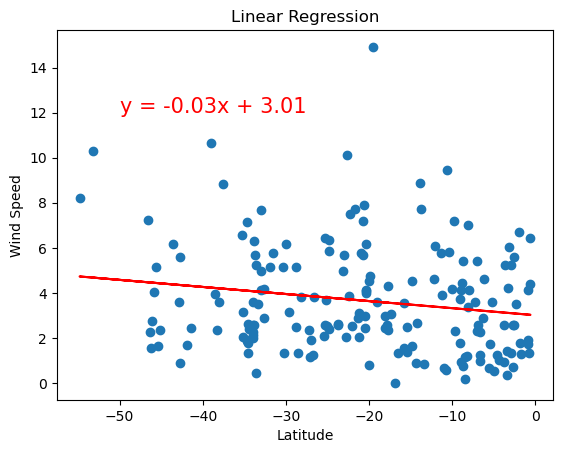

In [53]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The correlation between latitude and wind speed also doesn't show much of a relationship at all. The scatter plot
#seems to be all over the place showing no real correlation.